In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

# Load the Excel file
file_path = '../data/processed/main/processed_space_flight_data.xlsx'
next_space_flight_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe

display(next_space_flight_data)

date                                    place  \
0     Sun Apr 28, 2024 00:34 UTC       Kennedy Space Center, Florida, USA   
1     Thu Apr 25, 2024 12:59 UTC   Jiuquan Satellite Launch Center, China   
2     Tue Apr 23, 2024 22:32 UTC             Māhia Peninsula, New Zealand   
3     Tue Apr 23, 2024 22:17 UTC         Cape Canaveral SFS, Florida, USA   
4     Sat Apr 20, 2024 23:45 UTC   Xichang Satellite Launch Center, China   
...                          ...                                      ...   
6761  Wed Feb 05, 1958 07:33 UTC         Cape Canaveral SFS, Florida, USA   
6762  Sat Feb 01, 1958 03:47 UTC         Cape Canaveral SFS, Florida, USA   
6763  Fri Dec 06, 1957 16:44 UTC         Cape Canaveral SFS, Florida, USA   
6764  Sun Nov 03, 1957 02:30 UTC          Baikonur Cosmodrome, Kazakhstan   
6765  Fri Oct 04, 1957 19:28 UTC          Baikonur Cosmodrome, Kazakhstan   

     company_name                 budget           status   result  \
0          SpaceX   Price: $67.0 million   Status: Active  Success   
1            CASC    Price: $0.0 million   Status: Active  Success   
2      Rocket Lab    Price: $7.5 million   Status: Active  Success   
3          SpaceX   Price: $67.0 million   Status: Active  Success   
4            CASC  Price: $29.75 million   Status: Active  Success   
...           ...                    ...              ...      ...   
6761      US Navy    Price: $0.0 million  Status: Retired  Failure   
6762         ABMA    Price: $0.0 million  Status: Retired  Success   
6763      US Navy    Price: $0.0 million  Status: Retired  Failure   
6764    RVSN USSR    Price: $0.0 million  Status: Retired  Success   
6765    RVSN USSR    Price: $0.0 million  Status: Retired  Success   

                               space_flight_name  
0     Falcon 9 Block 5 | Galileo FOC FM25 & FM27  
1                  Long March 2F/G | Shenzhou 18  
2        Electron/Curie | Beginning Of The Swarm  
3         Falcon 9 Block 5 | Starlink Group 6-53  
4                   Long March 2D | Yaogan 42-02  
...                                          ...  
6761                   Vanguard | Vanguard TV3BU  
6762                         Juno I | Explorer 1  
6763                     Vanguard | Vanguard TV3  
6764                  Sputnik 8K71PS | Sputnik 2  
6765                  Sputnik 8K71PS | Sputnik 1  

[6766 rows x 7 columns]

In [3]:
import pandas as pd

# Assuming you have already read your DataFrame as next_space_flight_data

# Step 1: Clean 'budget' column
next_space_flight_data['budget (million of dollars)'] = next_space_flight_data['budget']\
    .str.replace('[^\d.]', '', regex=True)\
    .astype(float)

# Step 2: Extract the year from the 'date' column
next_space_flight_data['Year'] = next_space_flight_data['date'].str.extract(r'(\d{4})').astype(int)

# Drop the original 'budget' and 'date' columns
next_space_flight_data.drop(columns=['budget', 'date'], inplace=True)

# Step 3: Replace 0.0 values in the 'budget (million of dollars)' column with the mean of the non-zero values
mean_budget = next_space_flight_data['budget (million of dollars)']\
    [next_space_flight_data['budget (million of dollars)'] != 0].mean()

# Replace 0.0 values with the mean budget
next_space_flight_data['budget (million of dollars)'] = next_space_flight_data['budget (million of dollars)']\
    .replace(0.0, mean_budget)

# Step 4: Round the 'budget (million of dollars)' column to 2 decimal places
next_space_flight_data['budget (million of dollars)'] = next_space_flight_data['budget (million of dollars)'].round(2)

next_space_flight_data = next_space_flight_data[['Year', 'place', 'company_name', 'budget (million of dollars)', 'status', 'result', 'space_flight_name']]

In [4]:
# Step 4: Display the updated DataFrame
display(next_space_flight_data)


Year                                    place company_name  \
0     2024       Kennedy Space Center, Florida, USA       SpaceX   
1     2024   Jiuquan Satellite Launch Center, China         CASC   
2     2024             Māhia Peninsula, New Zealand   Rocket Lab   
3     2024         Cape Canaveral SFS, Florida, USA       SpaceX   
4     2024   Xichang Satellite Launch Center, China         CASC   
...    ...                                      ...          ...   
6761  1958         Cape Canaveral SFS, Florida, USA      US Navy   
6762  1958         Cape Canaveral SFS, Florida, USA         ABMA   
6763  1957         Cape Canaveral SFS, Florida, USA      US Navy   
6764  1957          Baikonur Cosmodrome, Kazakhstan    RVSN USSR   
6765  1957          Baikonur Cosmodrome, Kazakhstan    RVSN USSR   

      budget (million of dollars)           status   result  \
0                           67.00   Status: Active  Success   
1                           76.36   Status: Active  Success   
2                            7.50   Status: Active  Success   
3                           67.00   Status: Active  Success   
4                           29.75   Status: Active  Success   
...                           ...              ...      ...   
6761                        76.36  Status: Retired  Failure   
6762                        76.36  Status: Retired  Success   
6763                        76.36  Status: Retired  Failure   
6764                        76.36  Status: Retired  Success   
6765                        76.36  Status: Retired  Success   

                               space_flight_name  
0     Falcon 9 Block 5 | Galileo FOC FM25 & FM27  
1                  Long March 2F/G | Shenzhou 18  
2        Electron/Curie | Beginning Of The Swarm  
3         Falcon 9 Block 5 | Starlink Group 6-53  
4                   Long March 2D | Yaogan 42-02  
...                                          ...  
6761                   Vanguard | Vanguard TV3BU  
6762                         Juno I | Explorer 1  
6763                     Vanguard | Vanguard TV3  
6764                  Sputnik 8K71PS | Sputnik 2  
6765                  Sputnik 8K71PS | Sputnik 1  

[6766 rows x 7 columns]

# Data Analysis 

In [5]:
from IPython.display import display, Markdown

# Count the number of space flights each year
flights_per_year = next_space_flight_data['Year'].value_counts().sort_index()

# Display the result in a formatted manner with a title
display(Markdown("#### Number of Space Flights Each Year"))
display(flights_per_year)


#### Number of Space Flights Each Year

Year
1957      3
1958     28
1959     24
1960     41
1961     56
       ... 
2020    118
2021    157
2022    191
2023    232
2024     82
Name: count, Length: 68, dtype: int64

In [6]:
# Count the number of space flights by company
flights_per_company = next_space_flight_data['company_name'].value_counts()

# Display the result with a title
display(Markdown("#### Number of Space Flights by Company"))
display(flights_per_company)


#### Number of Space Flights by Company

company_name
RVSN USSR           2476
US Air Force         549
CASC                 533
Roscosmos            368
SpaceX               350
                    ... 
OneSpace               1
GK LS                  1
Space One              1
Space Pioneer          1
Relativity Space       1
Name: count, Length: 67, dtype: int64

In [7]:
# Calculate the average budget for space flights per company
average_budget_per_company = next_space_flight_data.groupby('company_name')['budget (million of dollars)'].mean().sort_values(ascending=False)

# Display the result with a title
display(Markdown("#### Average Budget for Space Flights Per Company (in Million of Dollars)"))
display(average_budget_per_company)


#### Average Budget for Space Flights Per Company (in Million of Dollars)

company_name
NASA               372.314955
ULA                134.955250
Arianespace        105.611717
MHI                 84.389556
Boeing              81.479420
                      ...    
Space One            9.000000
ExPace               7.600000
Rocket Lab           7.500000
Galactic Energy      4.380000
Astra                2.500000
Name: budget (million of dollars), Length: 67, dtype: float64

In [8]:
# Calculate the average budget by year
average_budget_by_year = next_space_flight_data.groupby('Year')['budget (million of dollars)'].mean()

# Display the result with a title
display(Markdown("#### Trend of Budget Over the Years (Average Budget per Year in Million of Dollars)"))
display(average_budget_by_year)


#### Trend of Budget Over the Years (Average Budget per Year in Million of Dollars)

Year
1957    76.360000
1958    76.360000
1959    76.360000
1960    76.360000
1961    76.360000
          ...    
2020    55.982288
2021    54.703758
2022    59.992408
2023    56.191336
2024    59.471220
Name: budget (million of dollars), Length: 68, dtype: float64

# Statistical Analysis 

In [9]:
# Display summary statistics for the 'budget (million of dollars)' column
budget_statistics = next_space_flight_data['budget (million of dollars)'].describe()

# Display the result with a title
display(Markdown("#### Summary Statistics for the Budget Column (in Million of Dollars)"))
display(budget_statistics)


#### Summary Statistics for the Budget Column (in Million of Dollars)

count    6766.000000
mean       76.361330
std        93.983074
min         2.500000
25%        59.500000
50%        76.360000
75%        76.360000
max      3000.000000
Name: budget (million of dollars), dtype: float64

In [10]:
# Calculate and display skewness and kurtosis for the 'budget (million of dollars)' column
budget_skewness = next_space_flight_data['budget (million of dollars)'].skew()
budget_kurtosis = next_space_flight_data['budget (million of dollars)'].kurtosis()

# Display the results with titles
display(Markdown("##### Skewness of the Budget Column"))
display(budget_skewness)

display(Markdown("##### Kurtosis of the Budget Column"))
display(budget_kurtosis)


##### Skewness of the Budget Column

13.248547414232066

##### Kurtosis of the Budget Column

314.1392610579324

In [11]:
# Display the correlation matrix for the numeric columns
# Select only the numeric columns for the correlation calculation
numeric_columns = ['Year', 'budget (million of dollars)']
correlation_matrix = next_space_flight_data[numeric_columns].corr()

# Display the result with a title
display(Markdown("#### Correlation Matrix for the Numeric Columns"))
display(correlation_matrix)


#### Correlation Matrix for the Numeric Columns

Year  budget (million of dollars)
Year                         1.000000                    -0.042801
budget (million of dollars) -0.042801                     1.000000

In [12]:
# Group the data by 'Year' and describe the budget statistics for each group
yearly_budget_analysis = next_space_flight_data.groupby('Year')['budget (million of dollars)'].describe()

# Display the result with a title
display(Markdown("#### Yearly Budget Variation Analysis"))
display(yearly_budget_analysis)


#### Yearly Budget Variation Analysis

count       mean           std    min    25%    50%    75%     max
Year                                                                    
1957    3.0  76.360000  0.000000e+00  76.36  76.36  76.36  76.36   76.36
1958   28.0  76.360000  2.894325e-14  76.36  76.36  76.36  76.36   76.36
1959   24.0  76.360000  4.354950e-14  76.36  76.36  76.36  76.36   76.36
1960   41.0  76.360000  1.438739e-14  76.36  76.36  76.36  76.36   76.36
1961   56.0  76.360000  2.867892e-14  76.36  76.36  76.36  76.36   76.36
...     ...        ...           ...    ...    ...    ...    ...     ...
2020  118.0  55.982288  4.844629e+01   2.50  25.00  64.68  67.00  350.00
2021  157.0  54.703758  4.199636e+01   2.50  25.00  64.68  67.00  350.00
2022  191.0  59.992408  7.191171e+01   2.50  29.15  67.00  67.00  876.00
2023  232.0  56.191336  3.570682e+01   4.38  29.75  67.00  67.00  350.00
2024   82.0  59.471220  4.012488e+01   5.80  30.80  67.00  67.00  350.00

[68 rows x 8 columns]

# Data visualization 

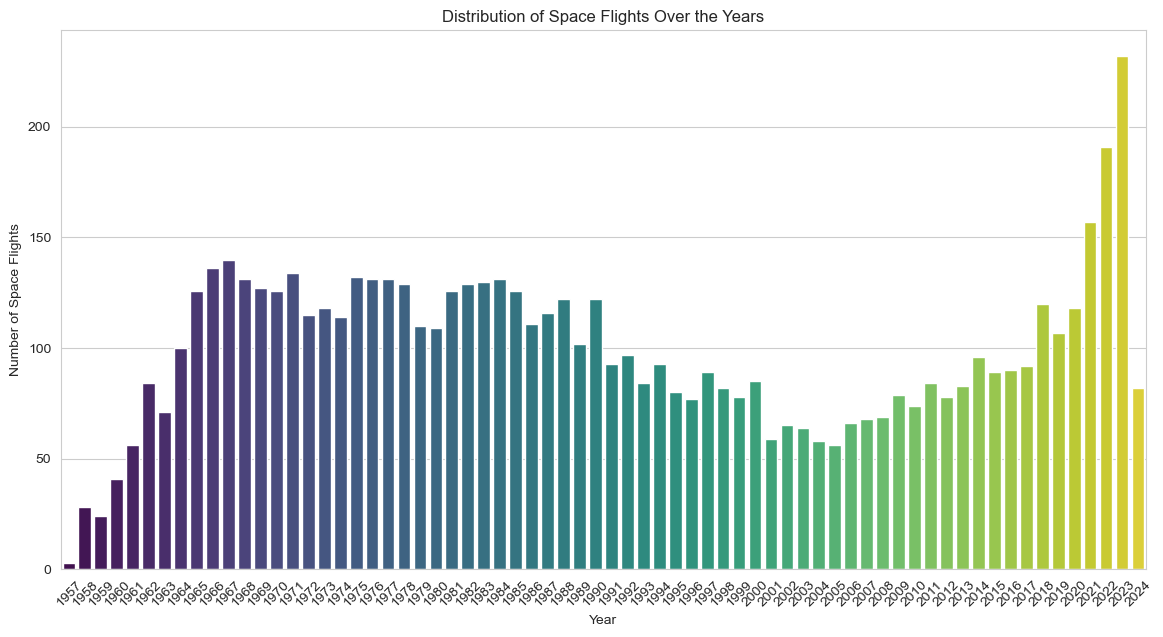

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Space Flights Over the Years
plt.figure(figsize=(14, 7))
sns.countplot(data=next_space_flight_data, x='Year', palette='viridis')
plt.title('Distribution of Space Flights Over the Years')
plt.ylabel('Number of Space Flights')
plt.xticks(rotation=45)
plt.show()


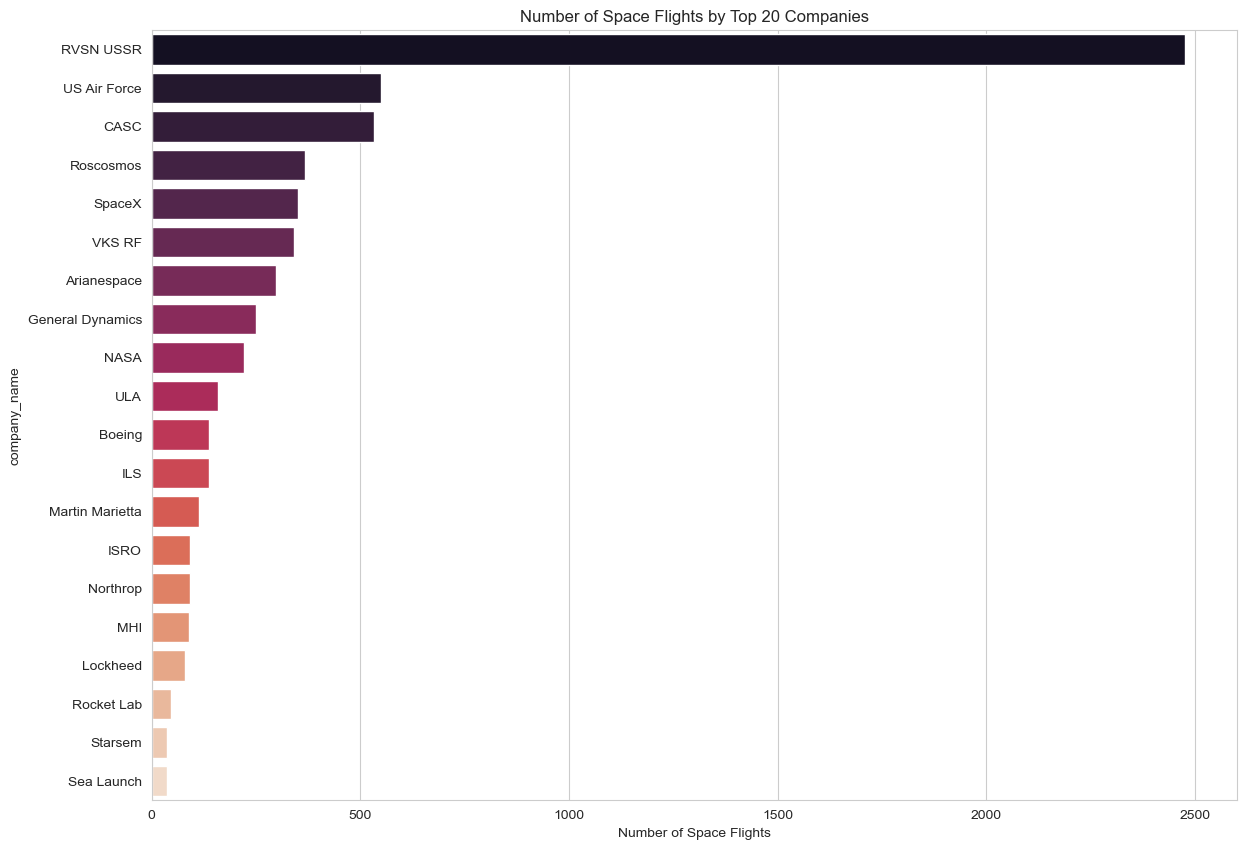

In [14]:
plt.figure(figsize=(14, 10))  # Increased figure size
top_companies = next_space_flight_data['company_name'].value_counts().head(20).index  # Limit to top 20 companies
sns.countplot(data=next_space_flight_data[next_space_flight_data['company_name'].isin(top_companies)], 
              y='company_name', 
              order=top_companies, 
              palette='rocket')
plt.title('Number of Space Flights by Top 20 Companies')
plt.xlabel('Number of Space Flights')
plt.show()


In [15]:
import plotly.express as px

# Filter the data to include only the top 20 companies by total number of space flights
top_companies = next_space_flight_data['company_name'].value_counts().head(20).index
top_companies_data = next_space_flight_data[next_space_flight_data['company_name'].isin(top_companies)]

# Prepare the data for the animated bar chart
# Group by year and company name, and count the number of flights
flights_by_year_company = top_companies_data.groupby(['Year', 'company_name']).size().reset_index(name='flights')

# Pivot the data to have companies on the y-axis and years as separate columns
flights_pivot = flights_by_year_company.pivot(index='company_name', columns='Year', values='flights').fillna(0)

# Convert the pivoted DataFrame back to a long-form DataFrame suitable for animation
flights_long_df = flights_pivot.reset_index().melt(id_vars='company_name', var_name='Year', value_name='flights')

# Create the animated bar chart using Plotly Express
fig = px.bar(
    flights_long_df,
    x="flights",
    y="company_name",
    animation_frame="Year",
    orientation='h',
    range_x=[0, flights_long_df['flights'].max()*1.1],
    color="company_name",
    title="Number of Space Flights by Top 20 Companies Over the Years"
)

# Update the layout for better readability
fig.update_layout(
    height=600,  # Adjust the height to accommodate the bars
    yaxis={'categoryorder':'total ascending'},
    showlegend=False
)

# Show the figure
fig.show()


In [16]:
import plotly.express as px

# Prepare the data for the animated plot
# Assuming you have a 'Year' column to group by as well
average_budget_per_company_year = next_space_flight_data.groupby(['Year', 'company_name'])['budget (million of dollars)'].mean().reset_index()

# Create the animated bar chart
fig = px.bar(
    average_budget_per_company_year,
    x="budget (million of dollars)",
    y="company_name",
    animation_frame="Year",
    orientation='h',
    range_x=[0, average_budget_per_company_year['budget (million of dollars)'].max()*1.1],
    color="company_name",
    title="Average Budget for Space Flights Per Company Over the Years (in Million of Dollars)"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


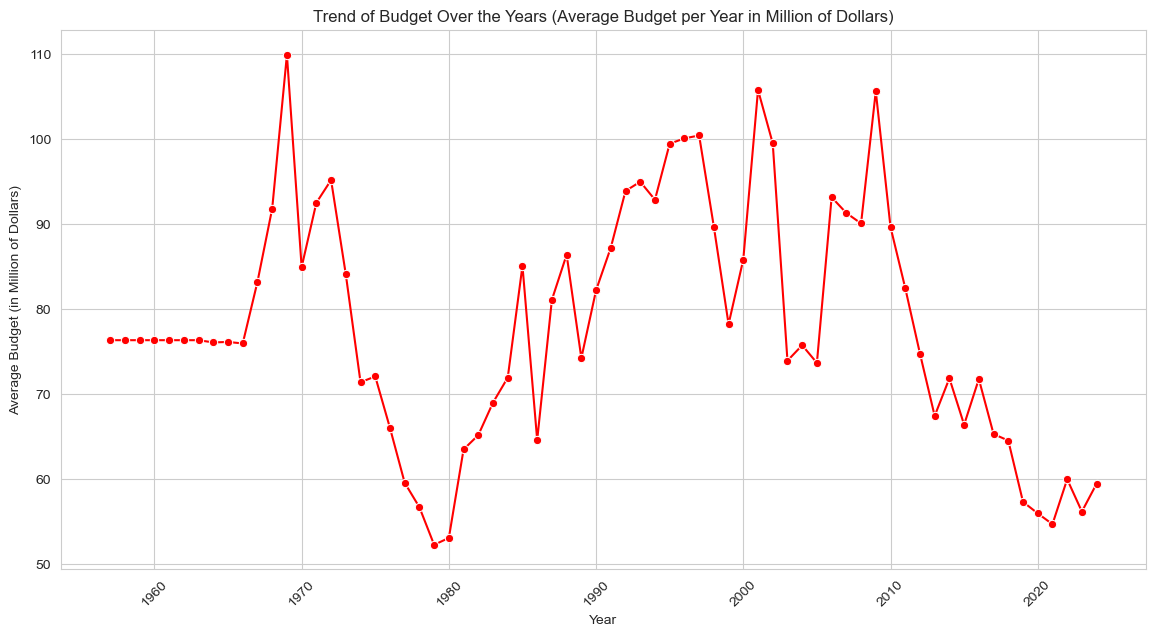

In [17]:
average_budget_by_year = next_space_flight_data.groupby('Year')['budget (million of dollars)'].mean()
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_budget_by_year, marker='o', color='red')
plt.title('Trend of Budget Over the Years (Average Budget per Year in Million of Dollars)')
plt.ylabel('Average Budget (in Million of Dollars)')
plt.xticks(rotation=45)
plt.show()


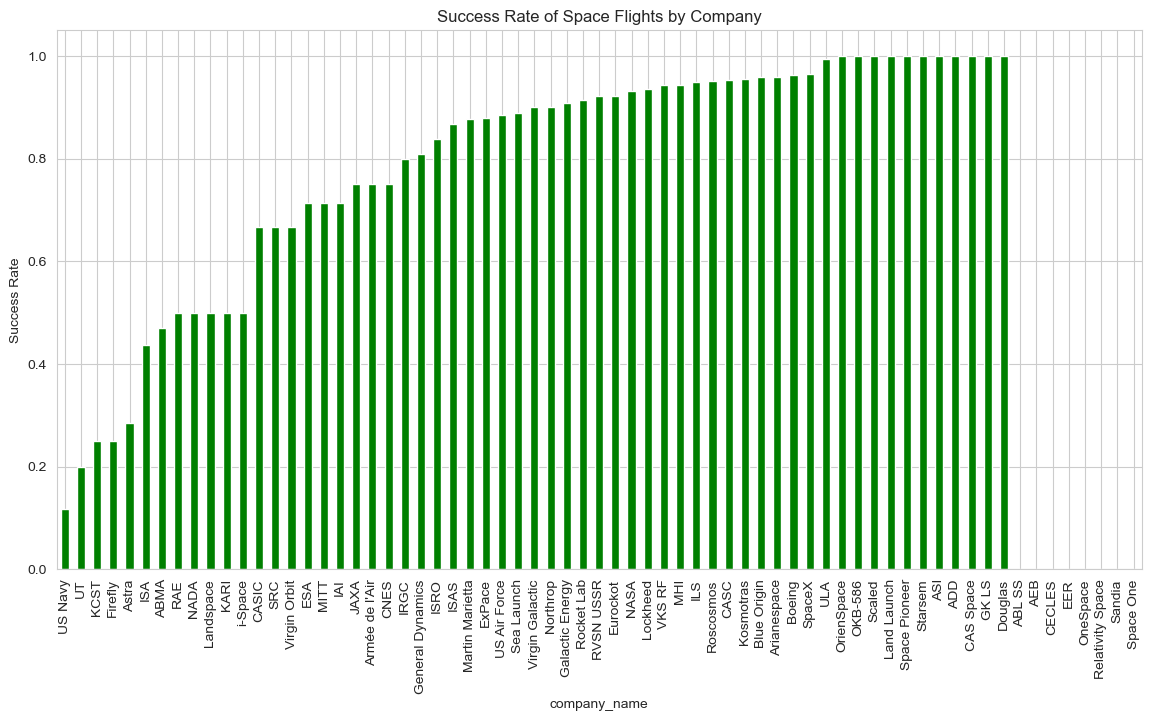

In [18]:
success_rate = (next_space_flight_data[next_space_flight_data['result'] == 'Success'].groupby('company_name').size() / next_space_flight_data.groupby('company_name').size()).sort_values()
plt.figure(figsize=(14, 7))
success_rate.plot(kind='bar', color='green')
plt.title('Success Rate of Space Flights by Company')
plt.ylabel('Success Rate')
plt.show()


# integration and analysis of final joined data frame 

### cleaned next space flight data for joint analysis 

In [19]:
# We split the 'place' string by commas and take the last element (-1) which should be the country
next_space_flight_data['Country'] = next_space_flight_data['place'].str.split(',').str[-1].str.strip()

# Now, we can drop the 'place' column if it's no longer needed
next_space_flight_data = next_space_flight_data.drop('place', axis=1)

# Optionally, you can rename the 'country' column to 'Country' for consistency
next_space_flight_data.rename(columns={'country': 'Country'}, inplace=True)

next_space_flight_data = next_space_flight_data[['Year', 'company_name',  'Country', 'space_flight_name']]

# Renaming the DataFrame columns
next_space_flight_data.rename(columns={
    'company_name': 'Company Name',
    'space_flight_name': 'Mission name'
}, inplace=True)

# Verifying the column names have been updated
display(next_space_flight_data.columns)

# Display the DataFrame to verify changes
display(next_space_flight_data.head())



Index(['Year', 'Company Name', 'Country', 'Mission name'], dtype='object')

Year Company Name      Country                                Mission name
0  2024       SpaceX          USA  Falcon 9 Block 5 | Galileo FOC FM25 & FM27
1  2024         CASC        China               Long March 2F/G | Shenzhou 18
2  2024   Rocket Lab  New Zealand     Electron/Curie | Beginning Of The Swarm
3  2024       SpaceX          USA      Falcon 9 Block 5 | Starlink Group 6-53
4  2024         CASC        China                Long March 2D | Yaogan 42-02

### NASA Missing space data frame 

In [20]:
import pandas as pd

# Load the Excel file
file_path = '../data/processed/main/processed_NASA_missing_space_missions.csv'
nasa_missing_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe

display(nasa_missing_data.head())

Year Company Name Country             Mission name
0  2010         NASA     USA               ARTEMIS-P1
1  2010         NASA     USA               ARTEMIS-P2
2  2011         NASA     USA                MESSENGER
3  2011         NASA     USA                     Dawn
4  2012         NASA     USA  Mars Science Laboratory

### Joined missing data for main data frame 

In [21]:
# Assuming 'nasa_missing_data' is another DataFrame with the same column names
# Concatenate the DataFrames by rows
combined_space_flights = pd.concat([next_space_flight_data, nasa_missing_data], ignore_index=True)

# Sort the combined DataFrame based on 'Year'
combined_space_flights_sorted = combined_space_flights.sort_values(by='Year')

# Display the resulting sorted DataFrame
display(combined_space_flights_sorted)


Year Company Name               Country  \
6763  1957      US Navy                   USA   
6764  1957    RVSN USSR            Kazakhstan   
6765  1957    RVSN USSR            Kazakhstan   
6748  1958      US Navy                   USA   
6757  1958    RVSN USSR            Kazakhstan   
...    ...          ...                   ...   
56    2024       SpaceX                   USA   
57    2024         CASC  China Coastal Waters   
58    2024         CASC                 China   
60    2024       SpaceX                   USA   
6786  2024         NASA                   USA   

                                      Mission name  
6763                       Vanguard | Vanguard TV3  
6764                    Sputnik 8K71PS | Sputnik 2  
6765                    Sputnik 8K71PS | Sputnik 1  
6748                           NOTS-EV-1 | Pilot 3  
6757                       Sputnik 8A91 | D-1 n°01  
...                                            ...  
56                         Falcon 9 Block 5 | PACE  
57                        Jielong-3 | 9 satellites  
58    Long March 2C | Geely Constellation Group 02  
60                    Falcon 9 Block 5 | CRS NG-20  
6786                                          IM-1  

[6787 rows x 4 columns]

In [22]:
mission_counts = combined_space_flights_sorted.groupby(['Year', 'Company Name']).size().reset_index(name='Total Missions')
mission_counts

Year     Company Name  Total Missions
0    1957        RVSN USSR               2
1    1957          US Navy               1
2    1958             ABMA               7
3    1958             NASA               2
4    1958        RVSN USSR               5
..    ...              ...             ...
818  2024        Space One               1
819  2024           SpaceX              43
820  2024              ULA               2
821  2024           VKS RF               1
822  2024  Virgin Galactic               1

[823 rows x 3 columns]

In [23]:
company_names = ['NASA', 'ISRO', 'Roscosmos']

# Filter the DataFrame to include only rows where the 'Company Name' is in the list of company names
filtered_df = mission_counts[mission_counts['Company Name'].isin(company_names)]

filtered_df = filtered_df.query('2004 <= Year <= 2021')

# Pivot the DataFrame
pivot_df = filtered_df.pivot_table(index='Year', columns='Company Name', values='Total Missions', fill_value=0)

# Rename columns for better clarity
pivot_df.columns = [col + '_Total_Missions' for col in pivot_df.columns]

# Reset the index to make 'Year' a column again
pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame
pivot_df.head()


Year  ISRO_Total_Missions  NASA_Total_Missions  Roscosmos_Total_Missions
0  2004                  1.0                  0.0                       9.0
1  2005                  1.0                  1.0                       9.0
2  2006                  1.0                  3.0                       7.0
3  2007                  3.0                  3.0                      10.0
4  2008                  3.0                  4.0                      10.0

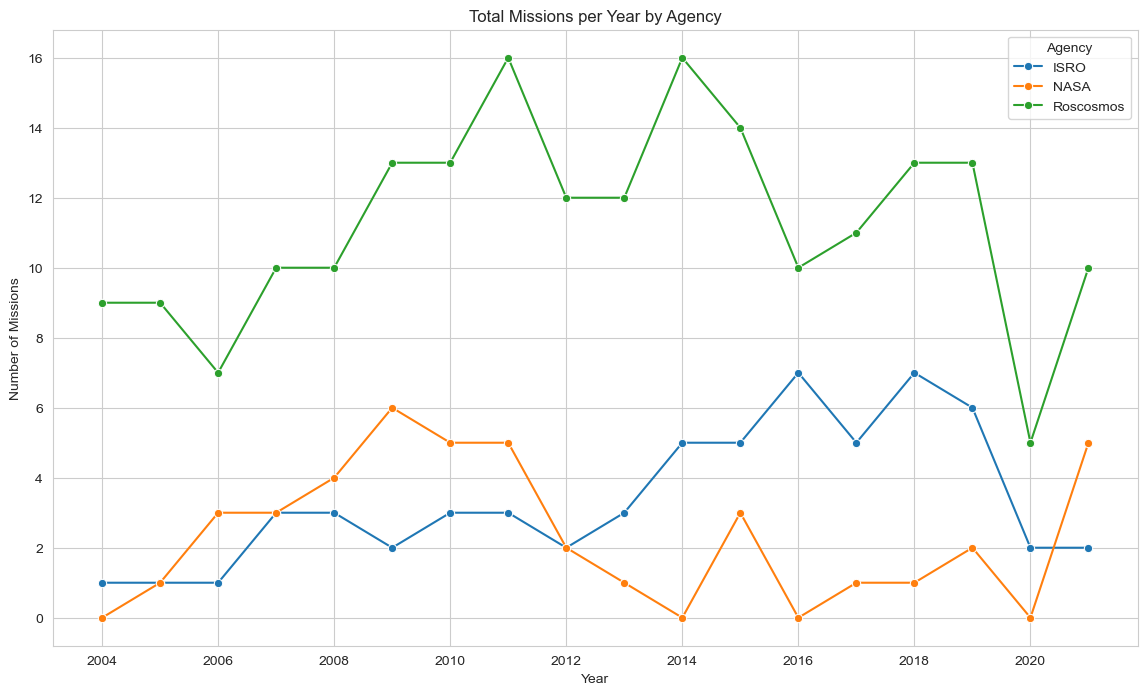

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_df, x='Year', y='ISRO_Total_Missions', marker='o', label='ISRO')
sns.lineplot(data=pivot_df, x='Year', y='NASA_Total_Missions', marker='o', label='NASA')
sns.lineplot(data=pivot_df, x='Year', y='Roscosmos_Total_Missions', marker='o', label='Roscosmos')
plt.title('Total Missions per Year by Agency')
plt.ylabel('Number of Missions')
plt.xlabel('Year')

# Adjust the x-axis to show only integer years
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend(title='Agency')
plt.grid(True)
plt.show()


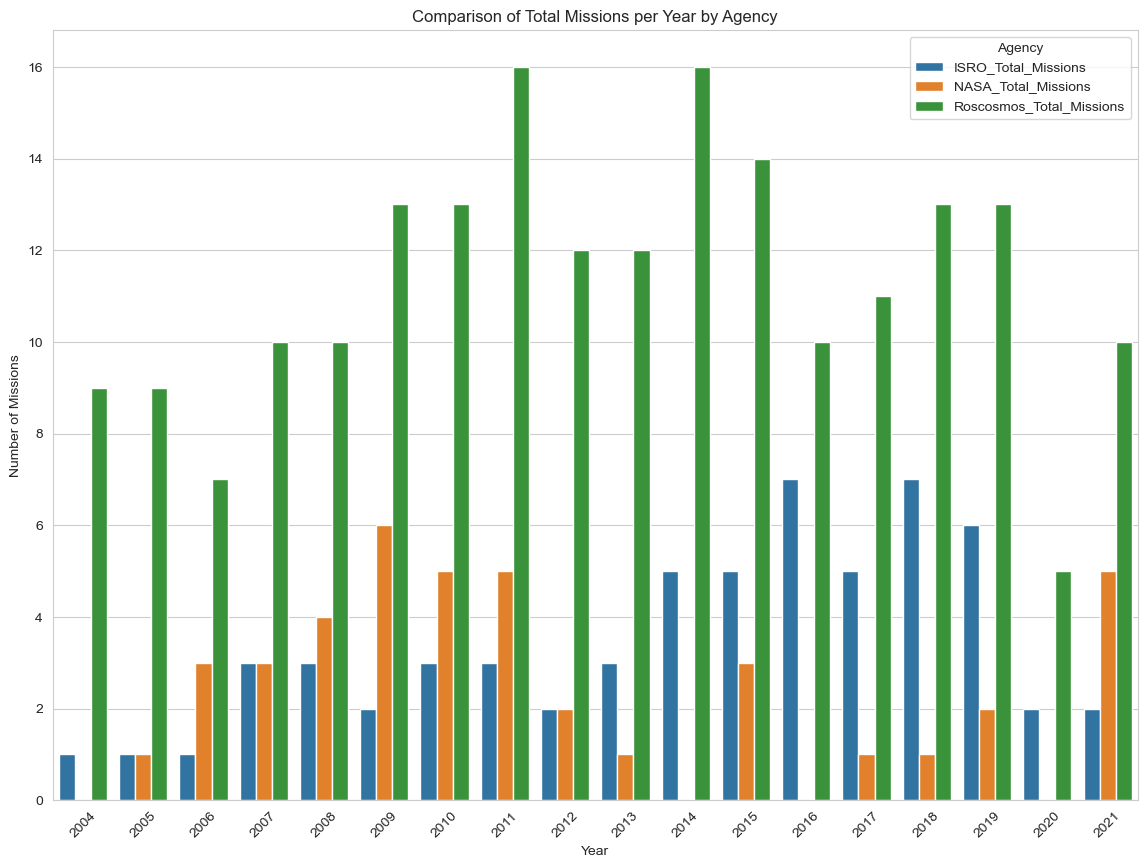

In [25]:
pivot_df_melted = pivot_df.melt(id_vars=['Year'], var_name='Agency', value_name='Missions')
plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Missions', hue='Agency', data=pivot_df_melted)
plt.title('Comparison of Total Missions per Year by Agency')
plt.ylabel('Number of Missions')
plt.xlabel('Year')
plt.legend(title='Agency')
plt.xticks(rotation=45)
plt.show()


<Figure size 3000x3000 with 0 Axes>

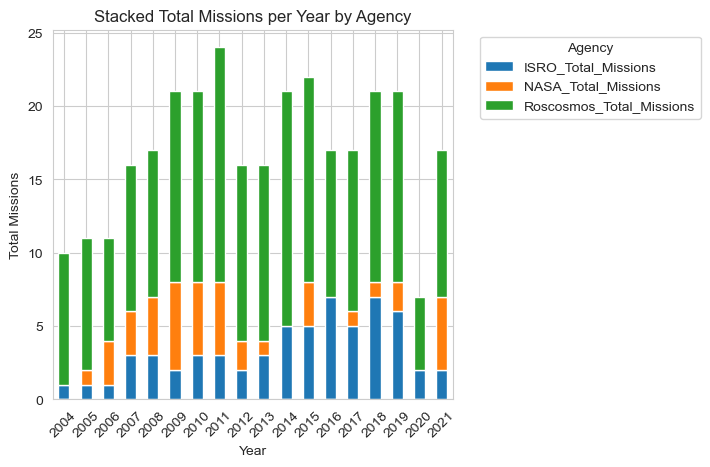

In [26]:
plt.figure(figsize=(30, 30))  # Increase the width of the figure
pivot_df.set_index('Year')[['ISRO_Total_Missions', 'NASA_Total_Missions', 'Roscosmos_Total_Missions']].plot(kind='bar', stacked=True)
plt.title('Stacked Total Missions per Year by Agency')
plt.ylabel('Total Missions')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)  # Adjust the right margin to make space for the legend
plt.show()


In [27]:
import plotly.express as px

# Creating a slider-based pie chart rather than an animation
fig = px.pie(
    pivot_df_melted[pivot_df_melted['Year'] == pivot_df_melted['Year'].max()],
    values='Missions',
    names='Agency',
    title=f'Missions Distribution in {pivot_df_melted["Year"].max()}'
)
fig.show()


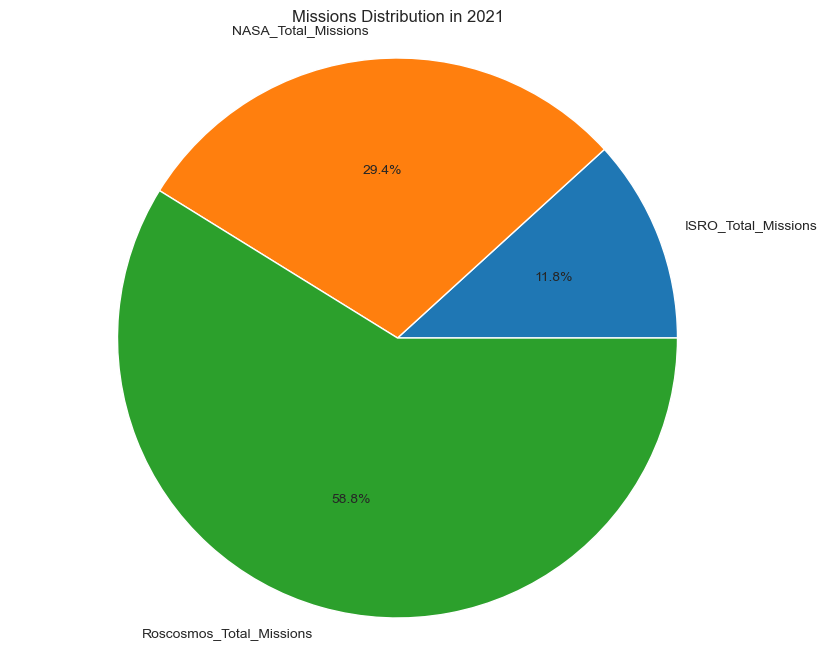

In [28]:
import matplotlib.pyplot as plt

# Assuming 'pivot_df_melted' is your DataFrame and it contains columns 'Year', 'Missions', and 'Agency'
# Filter the DataFrame for the latest year
latest_year_data = pivot_df_melted[pivot_df_melted['Year'] == pivot_df_melted['Year'].max()]

# Create a pie chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(latest_year_data['Missions'], labels=latest_year_data['Agency'], autopct='%1.1f%%')
plt.title(f'Missions Distribution in {pivot_df_melted["Year"].max()}')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


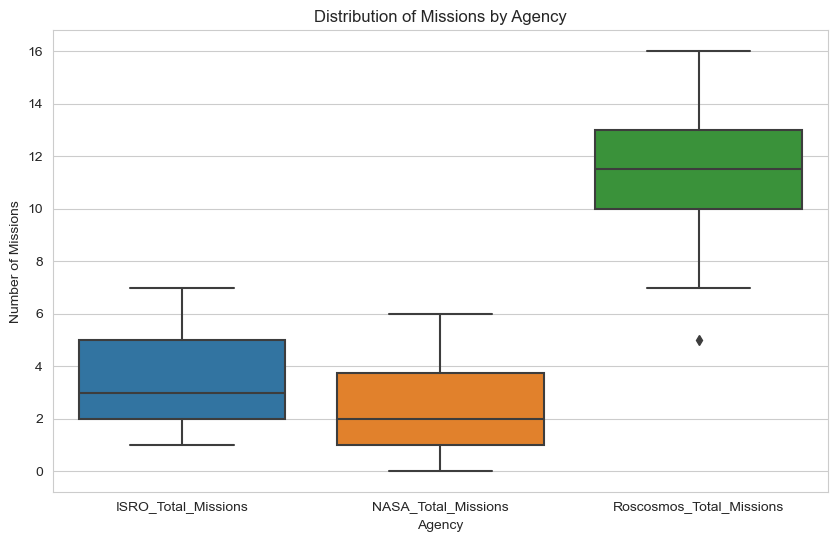

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pivot_df_melted, x='Agency', y='Missions')
plt.title('Distribution of Missions by Agency')
plt.xlabel('Agency')
plt.ylabel('Number of Missions')
plt.show()


# Merging budget of NASA and ISRO for final analysis 

In [30]:
mission_count_df = pivot_df.drop('Roscosmos_Total_Missions', axis=1) 
mission_count_df

Year  ISRO_Total_Missions  NASA_Total_Missions
0   2004                  1.0                  0.0
1   2005                  1.0                  1.0
2   2006                  1.0                  3.0
3   2007                  3.0                  3.0
4   2008                  3.0                  4.0
5   2009                  2.0                  6.0
6   2010                  3.0                  5.0
7   2011                  3.0                  5.0
8   2012                  2.0                  2.0
9   2013                  3.0                  1.0
10  2014                  5.0                  0.0
11  2015                  5.0                  3.0
12  2016                  7.0                  0.0
13  2017                  5.0                  1.0
14  2018                  7.0                  1.0
15  2019                  6.0                  2.0
16  2020                  2.0                  0.0
17  2021                  2.0                  5.0

In [31]:
import pandas as pd


nasa_budget = pd.read_csv('../data/processed/main/processed_NASA_budget_data.csv')
isro_budget = pd.read_excel('../data/processed/main/processed_indian_budget.xlsx')


In [32]:
nasa_budget['NASA Nominal Budget (millions of dollars)'] = nasa_budget['NASA Nominal Budget (millions of dollars)'].str.replace(r'\[.*?\]', '', regex=True).str.replace(',', '').astype(float)
nasa_budget['2023 Constant Dollars (Millions)'] = nasa_budget['2023 Constant Dollars (Millions)'].str.replace(r'\[.*?\]', '', regex=True).str.replace(',', '').astype(float)
nasa_budget['2023 Constant Dollars (Millions)'] = nasa_budget['2023 Constant Dollars (Millions)'].fillna(27481.0).round(2)
nasa_budget.head()

Year  NASA Nominal Budget (millions of dollars)  \
0  2004                                    15152.0   
1  2005                                    15602.0   
2  2006                                    15125.0   
3  2007                                    15861.0   
4  2008                                    17833.0   

   2023 Constant Dollars (Millions)  
0                           24442.0  
1                           24340.0  
2                           22860.0  
3                           23307.0  
4                           25236.0

In [33]:
isro_budget.head()

Year  ISRO Nominal Budget (millions of dollars)  \
0  2004                                 304.121832   
1  2005                                 320.112528   
2  2006                                 358.639860   
3  2007                                 393.360528   
4  2008                                 419.228580   

   2020 Constant USD (millions)  
0                     915.35304  
1                     924.19188  
2                     978.76392  
3                    1009.04016  
4                     992.78700

In [34]:
# Merge mission_count_df and nasa_budget on the 'Year' column
combined_df = pd.merge(mission_count_df, nasa_budget, on='Year', how='outer')

# Merge the combined_df with isro_budget on the 'Year' column
integrated_df = pd.merge(combined_df, isro_budget, on='Year', how='outer')

# Assuming your DataFrame is named final_combined_df
integrated_df.rename(columns={
    '2023 Constant Dollars (Millions)': 'NASA 2023 Constant (millions of dollars)',
    '2020 Constant USD (millions)': 'ISRO 2020 Constant (millions of dollars)'
}, inplace=True)



display(integrated_df)


Year  ISRO_Total_Missions  NASA_Total_Missions  \
0   2004                  1.0                  0.0   
1   2005                  1.0                  1.0   
2   2006                  1.0                  3.0   
3   2007                  3.0                  3.0   
4   2008                  3.0                  4.0   
5   2009                  2.0                  6.0   
6   2010                  3.0                  5.0   
7   2011                  3.0                  5.0   
8   2012                  2.0                  2.0   
9   2013                  3.0                  1.0   
10  2014                  5.0                  0.0   
11  2015                  5.0                  3.0   
12  2016                  7.0                  0.0   
13  2017                  5.0                  1.0   
14  2018                  7.0                  1.0   
15  2019                  6.0                  2.0   
16  2020                  2.0                  0.0   
17  2021                  2.0                  5.0   

    NASA Nominal Budget (millions of dollars)  \
0                                     15152.0   
1                                     15602.0   
2                                     15125.0   
3                                     15861.0   
4                                     17833.0   
5                                     17782.0   
6                                     18724.0   
7                                     18448.0   
8                                     17770.0   
9                                     16865.0   
10                                    17647.0   
11                                    18010.0   
12                                    19300.0   
13                                    19508.0   
14                                    20736.0   
15                                    21500.0   
16                                    22629.0   
17                                    23271.0   

    NASA 2023 Constant (millions of dollars)  \
0                                    24442.0   
1                                    24340.0   
2                                    22860.0   
3                                    23307.0   
4                                    25236.0   
5                                    25254.0   
6                                    26162.0   
7                                    24987.0   
8                                    23583.0   
9                                    22059.0   
10                                   22712.0   
11                                   23150.0   
12                                   24502.0   
13                                   24249.0   
14                                   25160.0   
15                                   25622.0   
16                                   26559.0   
17                                   27481.0   

    ISRO Nominal Budget (millions of dollars)  \
0                                  304.121832   
1                                  320.112528   
2                                  358.639860   
3                                  393.360528   
4                                  419.228580   
5                                  499.555188   
6                                  537.867780   
7                                  454.894656   
8                                  582.754068   
9                                  620.274168   
10                                 698.563956   
11                                 830.400624   
12                                 964.799616   
13                                1095.667968   
14                                1343.118792   
15                                1563.995004   
16                                1138.806468   
17                                1496.860800   

    ISRO 2020 Constant (millions of dollars)  
0                                  915.35304  
1                                  924.19188  
2                                  978.76392  
3           

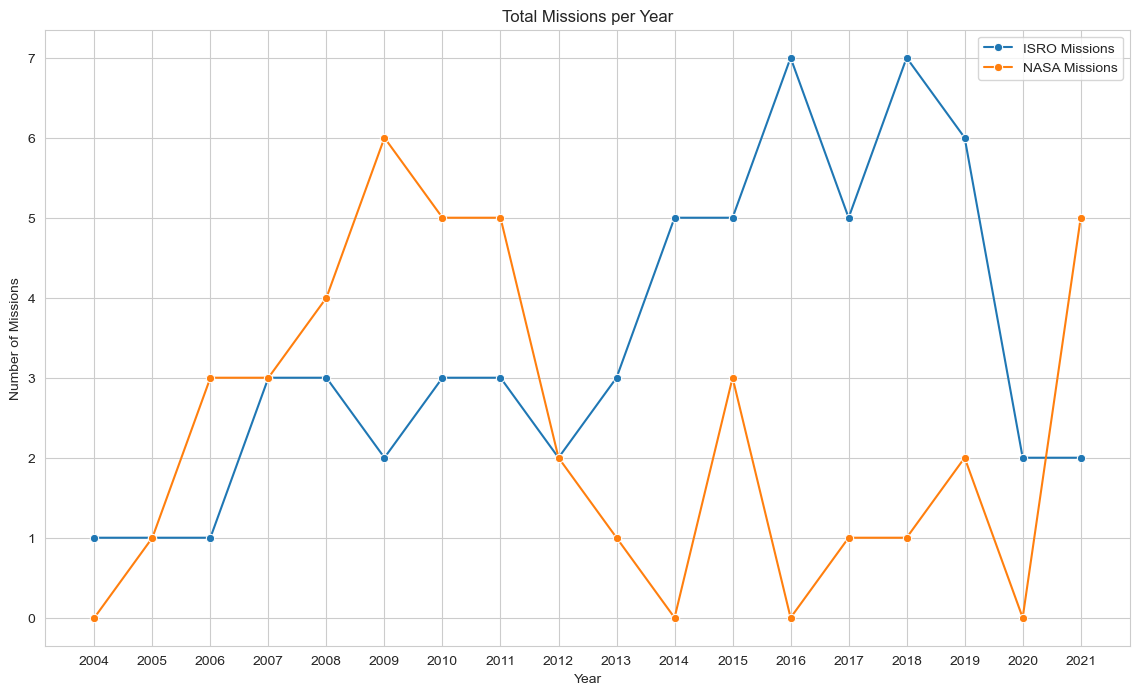

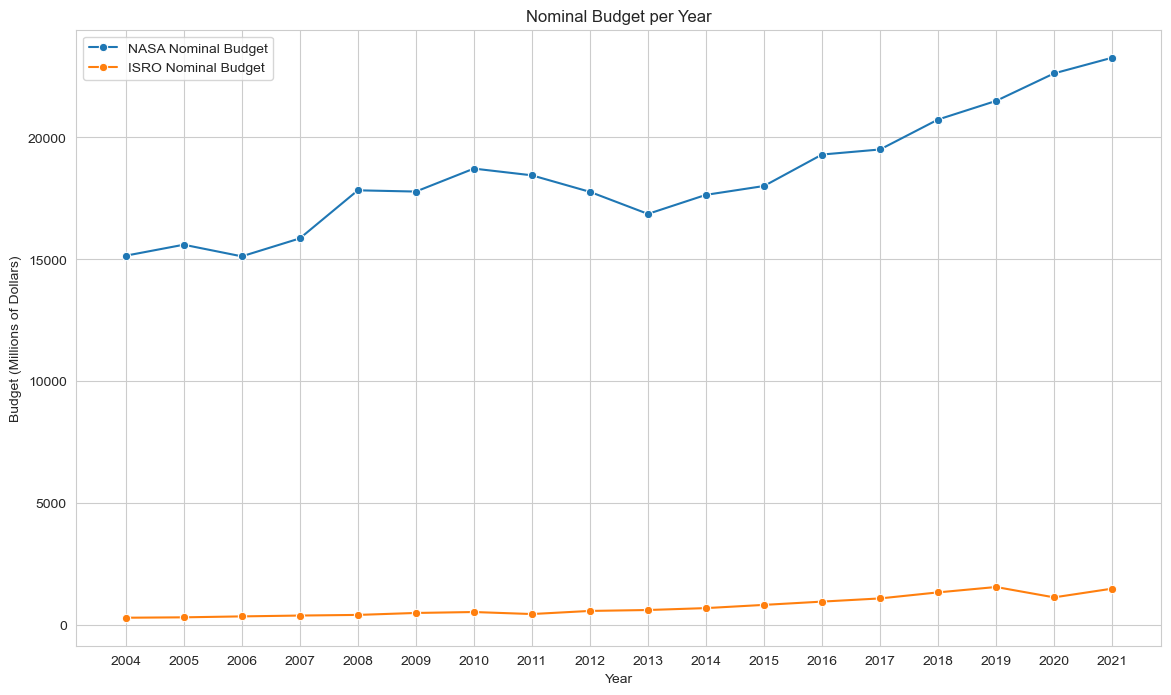

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the total missions for ISRO and NASA
plt.figure(figsize=(14, 8))
sns.lineplot(data=integrated_df, x='Year', y='ISRO_Total_Missions', marker='o', label='ISRO Missions')
sns.lineplot(data=integrated_df, x='Year', y='NASA_Total_Missions', marker='o', label='NASA Missions')
plt.title('Total Missions per Year')
plt.ylabel('Number of Missions')
plt.xlabel('Year')
plt.xticks(integrated_df['Year'].unique())  # Ensuring x-ticks are integer years
plt.legend()
plt.grid(True)
plt.show()

# Plotting the budgets for NASA and ISRO
plt.figure(figsize=(14, 8))
sns.lineplot(data=integrated_df, x='Year', y='NASA Nominal Budget (millions of dollars)', marker='o', label='NASA Nominal Budget')
sns.lineplot(data=integrated_df, x='Year', y='ISRO Nominal Budget (millions of dollars)', marker='o', label='ISRO Nominal Budget')
plt.title('Nominal Budget per Year')
plt.ylabel('Budget (Millions of Dollars)')
plt.xlabel('Year')
plt.xticks(integrated_df['Year'].unique())  # Ensuring x-ticks are integer years
plt.legend()
plt.grid(True)
plt.show()


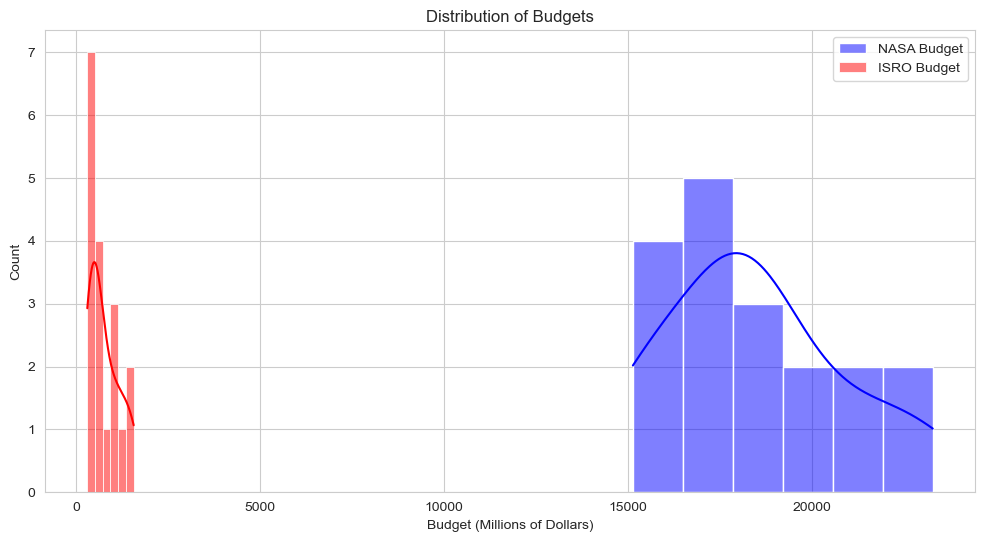

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(integrated_df['NASA Nominal Budget (millions of dollars)'], kde=True, color='blue', label='NASA Budget')
sns.histplot(integrated_df['ISRO Nominal Budget (millions of dollars)'], kde=True, color='red', label='ISRO Budget')
plt.title('Distribution of Budgets')
plt.xlabel('Budget (Millions of Dollars)')
plt.legend()
plt.show()



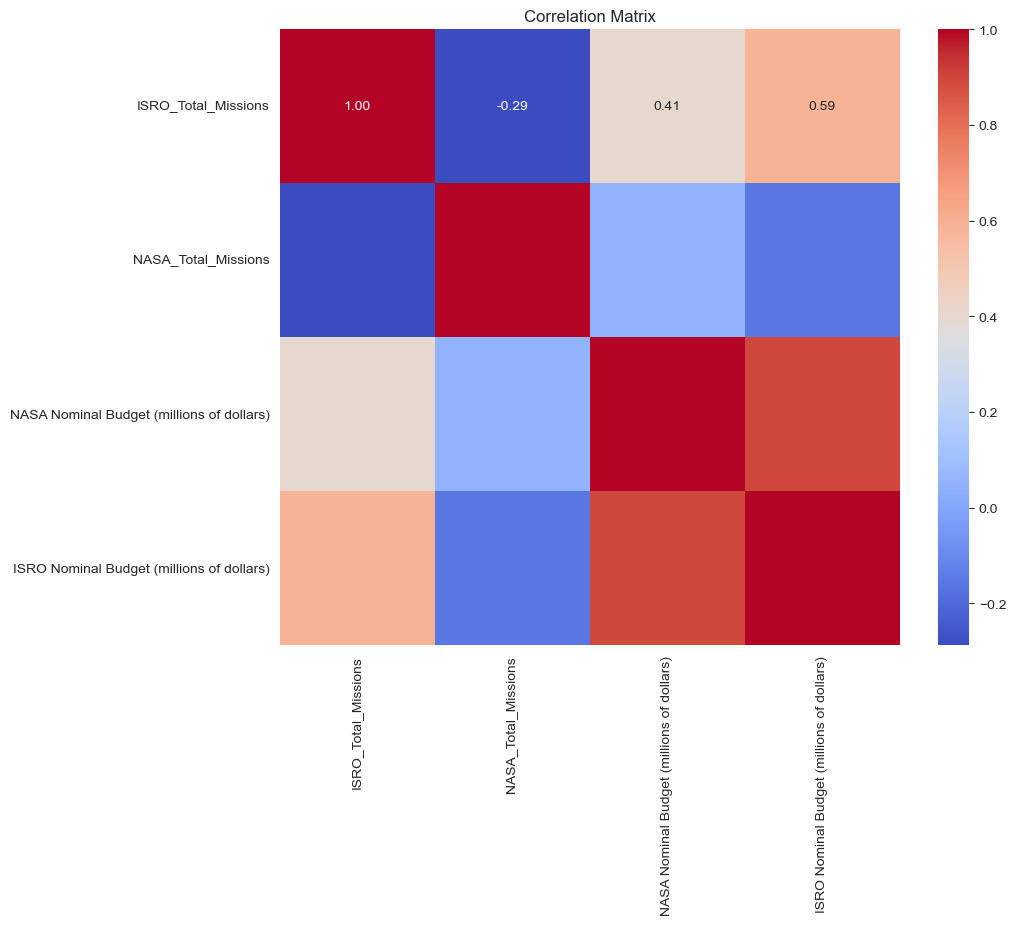

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(integrated_df[['ISRO_Total_Missions', 'NASA_Total_Missions', 'NASA Nominal Budget (millions of dollars)', 'ISRO Nominal Budget (millions of dollars)']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


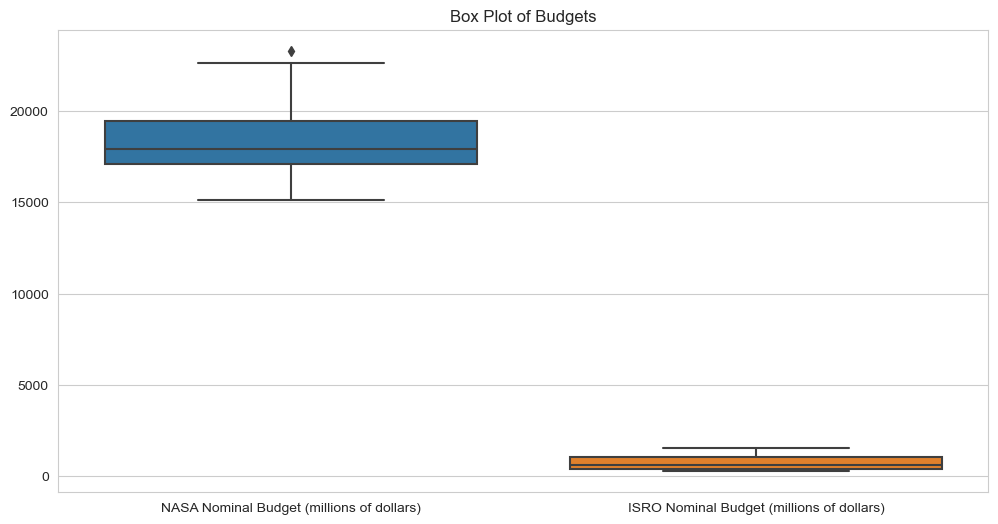

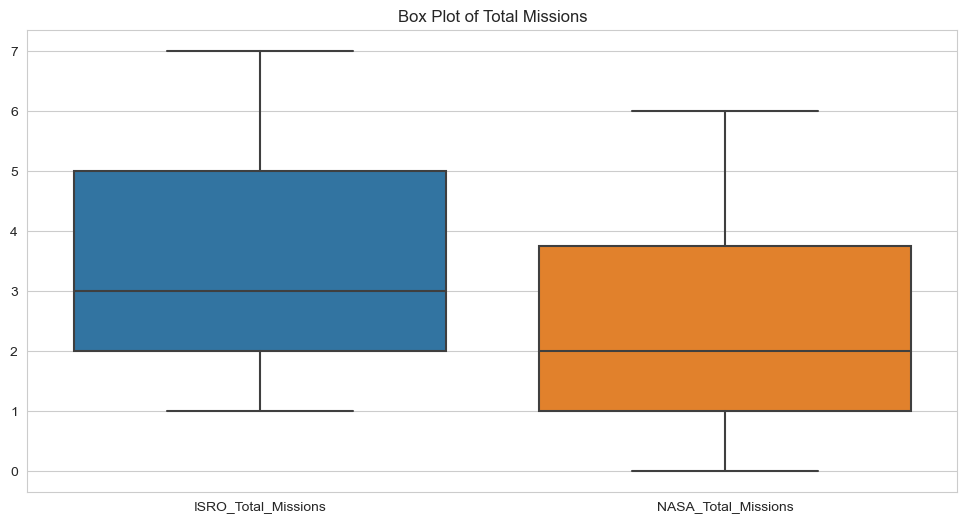

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=integrated_df[['NASA Nominal Budget (millions of dollars)', 'ISRO Nominal Budget (millions of dollars)']])
plt.title('Box Plot of Budgets')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=integrated_df[['ISRO_Total_Missions', 'NASA_Total_Missions']])
plt.title('Box Plot of Total Missions')
plt.show()


# Machine learning analysis to predict future budgets of NASA and ISRO

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [40]:
# Prepare DataFrame for modeling
df = integrated_df[['Year', 'ISRO_Total_Missions', 'NASA_Total_Missions', 'NASA Nominal Budget (millions of dollars)', 'ISRO Nominal Budget (millions of dollars)']]

# Years to predict
future_years = np.array([df['Year'].max() + i for i in range(1, 6)]).reshape(-1, 1)


In [41]:
def predict_future(column_name):
    # Reshape year data for sklearn
    X = df[['Year']].values.reshape(-1, 1)
    y = df[column_name].values
    
    # Fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions for existing and future years
    pred_years = np.vstack([X, future_years])
    predictions = model.predict(pred_years)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(df['Year'], y, color='blue', label='Actual Data')
    plt.plot(pred_years, predictions, color='red', linestyle='--', label='Regression Line')
    plt.title(f'Future Prediction of {column_name}')
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return predictions for future years
    return predictions[-5:]


Predictions for ISRO_Total_Missions:


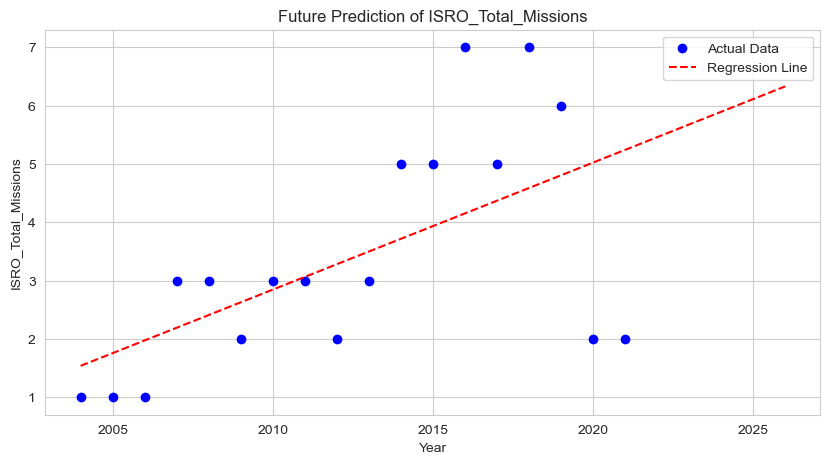

Predictions for NASA_Total_Missions:


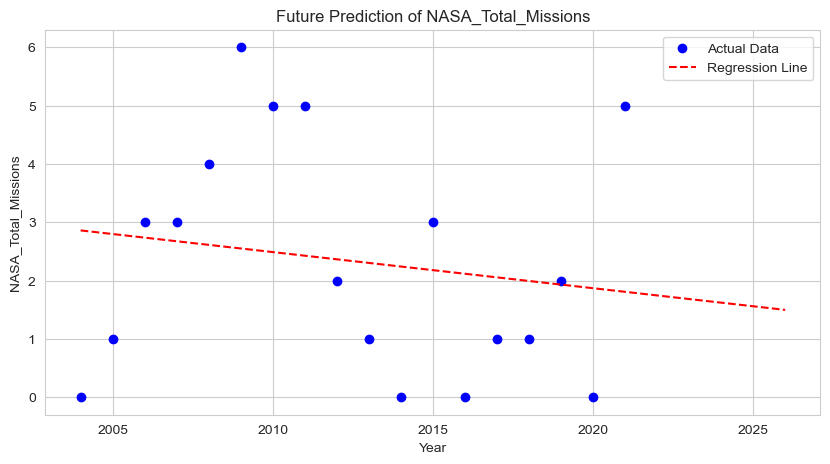

Predictions for NASA Nominal Budget (millions of dollars):


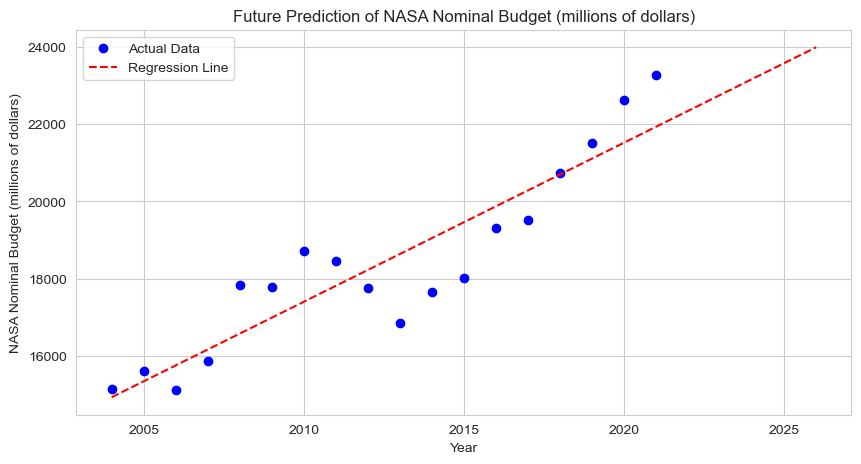

Predictions for ISRO Nominal Budget (millions of dollars):


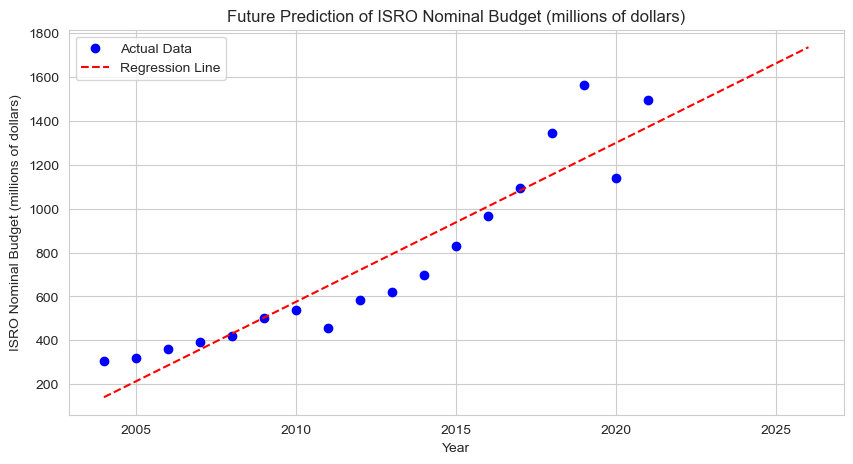

In [42]:
columns_to_predict = [
    'ISRO_Total_Missions', 
    'NASA_Total_Missions', 
    'NASA Nominal Budget (millions of dollars)', 
    'ISRO Nominal Budget (millions of dollars)'
]

predictions = {}
for column in columns_to_predict:
    print(f"Predictions for {column}:")
    predictions[column] = predict_future(column)


In [43]:
def predict_future(column_name):
    # Reshape year data for sklearn
    X = df[['Year']].values.reshape(-1, 1)
    y = df[column_name].values
    
    # Fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions for existing and future years
    pred_years = np.vstack([X, future_years])
    predictions = model.predict(pred_years)
    
    # Return only the predictions for future years as a Series
    future_preds = pd.Series(predictions[-5:], index=[year[0] for year in future_years])
    
    return future_preds

# Create an empty DataFrame to store future predictions
future_predictions_df = pd.DataFrame(index=[year[0] for year in future_years])

# Generate predictions for each column and add to DataFrame
columns_to_predict = [
    'ISRO_Total_Missions', 
    'NASA_Total_Missions', 
    'NASA Nominal Budget (millions of dollars)', 
    'ISRO Nominal Budget (millions of dollars)'
]

for column in columns_to_predict:
    if 'Missions' in column:  # Check if the column is about missions
        future_predictions_df[column] = predict_future(column).apply(np.ceil).astype(int)
    else:
        future_predictions_df[column] = predict_future(column)

# Display the DataFrame with future predictions
print("Future Predictions for the Next 5 Years:")
display(future_predictions_df)


Future Predictions for the Next 5 Years:


ISRO_Total_Missions  NASA_Total_Missions  \
2022                    6                    2   
2023                    6                    2   
2024                    6                    2   
2025                    7                    2   
2026                    7                    2   

      NASA Nominal Budget (millions of dollars)  \
2022                               22340.601307   
2023                               22752.109047   
2024                               23163.616787   
2025                               23575.124527   
2026                               23986.632267   

      ISRO Nominal Budget (millions of dollars)  
2022                                1445.557981  
2023                                1518.055181  
2024                                1590.552382  
2025                                1663.049582  
2026                                1735.546782

In [44]:
# Run this in a Jupyter Notebook cell to output the installed packages to a text file
!pip freeze > requirements.txt
